In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def display_high_number(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [3]:
def prepare_mode_data(samples):
    return [ float(f'{s:.2f}') for s in samples]

# Convergence study

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('comparisons_ssim_M21.csv', sep=";", header=None)

In [6]:
def display_high_number_50(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [18]:
labels = [r'$G$-MON$_b$', r'$G$-DMON', r'$G$-MON', r'$G$-DMON$_p$', r'$G$-MON$_p$', r'Mean', r'MON']
order = [5, 6, 2, 0, 1]
scene_df = df[df.loc[:, 1] == 'p3d_bidir']
scene_df = df[df.loc[:, 0].str.contains('comparisons-M21')]
scene_df

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
0,comparisons-M21-gini-binary-mon,p3d_bidir,0.108280,0.182950,0.250472,0.300814,0.346399,0.381848,0.413722,0.442721,...,0.885223,0.885237,0.885257,0.885275,0.885274,0.885292,0.885303,0.885308,0.885324,0.885316
1,comparisons-M21-gini-dmon,p3d_bidir,0.124828,0.212268,0.287063,0.343835,0.395490,0.434567,0.469823,0.501377,...,0.939444,0.939449,0.939474,0.939476,0.939489,0.939504,0.939523,0.939537,0.939547,0.939557
2,comparisons-M21-gini-mon,p3d_bidir,0.122552,0.204157,0.276537,0.331025,0.381400,0.420421,0.455402,0.487416,...,0.938403,0.938412,0.938415,0.938423,0.938439,0.938449,0.938464,0.938484,0.938483,0.938488
3,comparisons-M21-gini-partial-dmon,p3d_bidir,0.159702,0.258339,0.328488,0.380240,0.424558,0.458107,0.486773,0.512246,...,0.887709,0.887704,0.887730,0.887730,0.887733,0.887750,0.887777,0.887791,0.887805,0.887789
4,comparisons-M21-gini-partial-mon,p3d_bidir,0.159963,0.235282,0.300443,0.350511,0.395377,0.429762,0.460930,0.489075,...,0.886722,0.886752,0.886784,0.886798,0.886820,0.886817,0.886840,0.886853,0.886883,0.886889
5,comparisons-M21-mean,p3d_bidir,0.191231,0.227304,0.250365,0.266745,0.279534,0.290138,0.299016,0.306453,...,0.768763,0.768818,0.768858,0.768892,0.768957,0.769013,0.769089,0.769143,0.769222,0.769276
6,comparisons-M21-mon,p3d_bidir,0.107270,0.181690,0.248848,0.300191,0.346109,0.381899,0.414104,0.443954,...,0.936947,0.936951,0.936976,0.936981,0.936980,0.936987,0.936990,0.937005,0.937031,0.937039


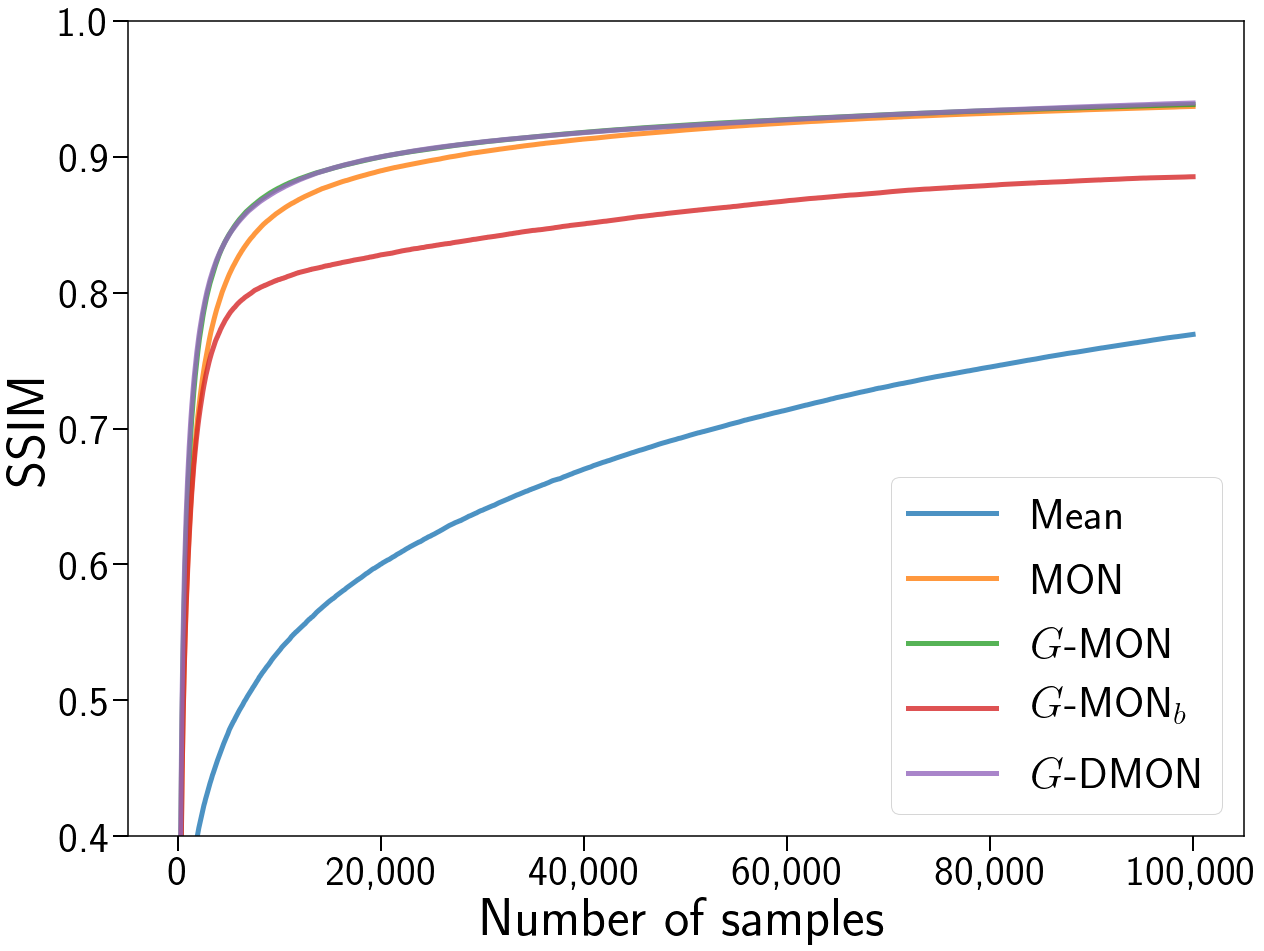

In [19]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 12)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:2002], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 2200, step=400), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.4, 1.1, step=0.1), prepare_mode_data(np.arange(0.4, 1.1, step=0.1)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.4, 1))
plt.savefig('images/gmon_p3d_bidir_M21_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

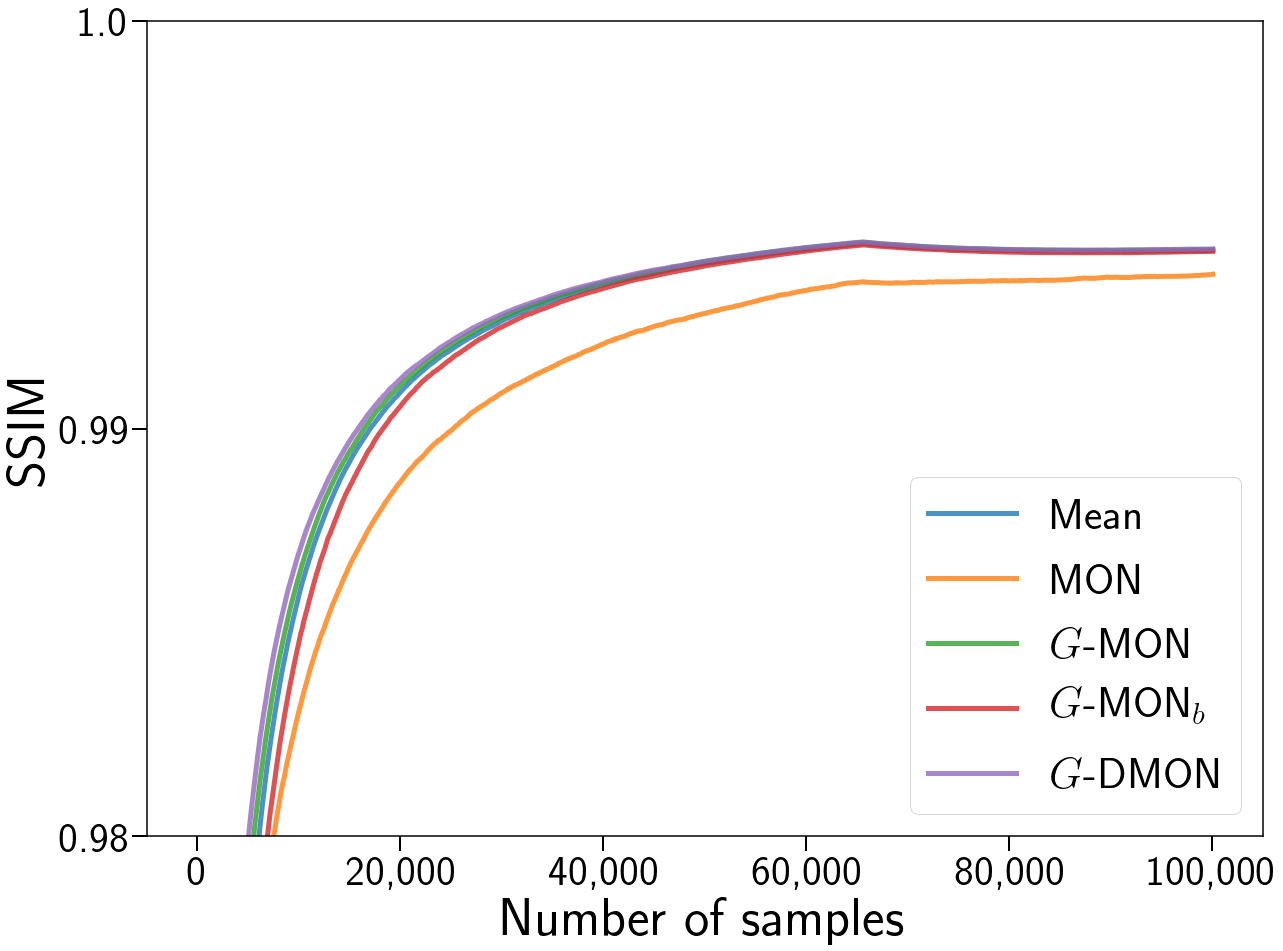

In [74]:
scene_df = df[df.loc[:, 1] == 'p3d_crown']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (20, 15)}

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:2002], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 2200, step=400), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.98, 1.02, step=0.01), prepare_mode_data(np.arange(0.98, 1.02, step=0.01)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.98, 1))
plt.savefig('images/gmon_p3d_crown_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)

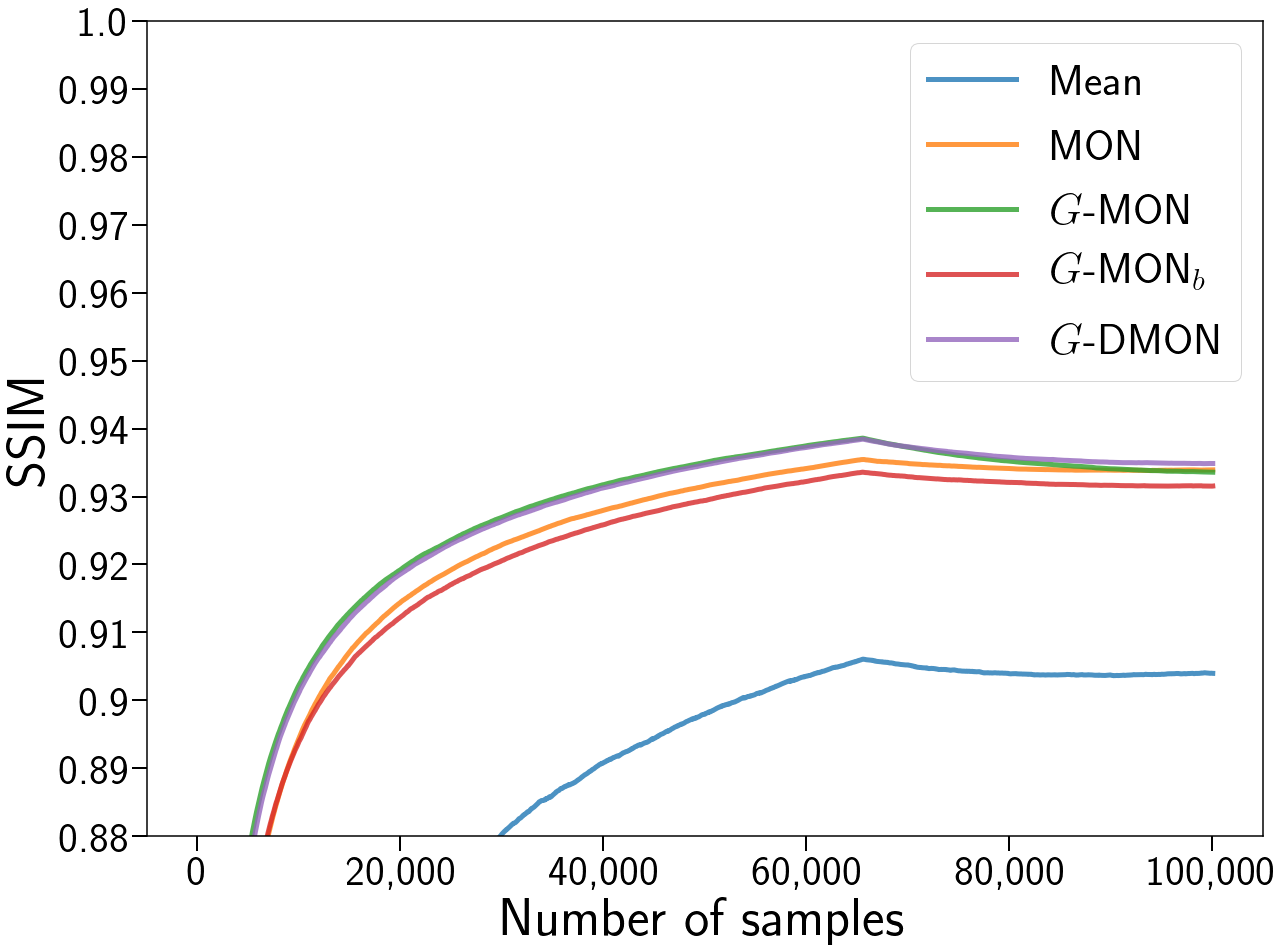

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
3,comparisons-dist-gini_mon,p3d_villa-lights-on,0.344570,0.432874,0.492811,0.538976,0.574482,0.603117,0.626742,0.646664,...,0.934856,0.934862,0.934867,0.934867,0.934867,0.934862,0.934859,0.934855,0.934860,0.934861
7,comparisons-dist-gini_partial_mon,p3d_villa-lights-on,0.344325,0.432394,0.492890,0.538472,0.574413,0.603004,0.626462,0.646135,...,0.932190,0.932174,0.932175,0.932167,0.932162,0.932158,0.932149,0.932149,0.932145,0.932149
11,comparisons-gini_binary_mon,p3d_villa-lights-on,0.331271,0.411863,0.471992,0.517431,0.552437,0.581185,0.604914,0.624724,...,0.931527,0.931532,0.931528,0.931521,0.931523,0.931523,0.931523,0.931528,0.931532,0.931540
15,comparisons-gini_mon,p3d_villa-lights-on,0.355228,0.443707,0.504168,0.549500,0.584860,0.613117,0.636695,0.656133,...,0.933585,0.933584,0.933590,0.933591,0.933594,0.933590,0.933584,0.933579,0.933578,0.933579
19,comparisons-gini_partial_mon,p3d_villa-lights-on,0.440467,0.511192,0.558529,0.593747,0.620764,0.643119,0.661013,0.676390,...,0.929863,0.929861,0.929862,0.929856,0.929858,0.929860,0.929859,0.929858,0.929869,0.929874
23,comparisons-mean,p3d_villa-lights-on,0.461345,0.511214,0.541433,0.562446,0.578650,0.591807,0.602889,0.612121,...,0.904015,0.904005,0.904000,0.903977,0.903983,0.903994,0.904002,0.903989,0.903983,0.903979
27,comparisons-mon,p3d_villa-lights-on,0.329238,0.410168,0.470381,0.515787,0.551144,0.580052,0.603980,0.623921,...,0.933903,0.933907,0.933905,0.933904,0.933906,0.933916,0.933919,0.933924,0.933922,0.933923


In [73]:
scene_df = df[df.loc[:, 1] == 'p3d_villa-lights-on']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (20, 15)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:2002], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 2200, step=400), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.85, 1.01, step=0.01), prepare_mode_data(np.arange(0.85, 1.01, step=0.01)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.88, 1))
plt.savefig('images/gmon_p3d_villa_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()
scene_df